## Data Description

This data represents the results of a large product testing study. For each `product_code` you are given a number of product `attributes` (fixed for the code) as well as a number of `measurement` values for each individual product, representing various lab testing methods. Each product is used in a simulated real-world environment experiment, and and absorbs a certain amount of fluid (`loading`) to see whether or not it fails. &nbsp;

Your task is to use the data to predict individual product failures of new codes with their individual lab test results.

## Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.<br>
The higher, the better

## Understanding

- Same product_code means they are the same products
- Same product consists of same attributes

## Blueprint

1. Numerize 'attribute_0' and 'attribute_1'
2. Drop the product code(A, B, C, D, E)
3. Apply PCA
4. Split into training and validating data
5. Apply ML models

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder

# Show all the columns and rows
pd.set_option("display.max_columns", None)  # columns
# pd.set_option("display.max_rows", None)   # rows

# Ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1. Data Loading

In [2]:
# Load dataset
data = pd.read_csv('train.csv') # training
te = pd.read_csv('test.csv')    # testing

print(data.shape)
data.head()

(26570, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [3]:
# Store 'id'
id = data.id
id_te = te.id

# Drop 'id'
data = data.drop(columns=['id'])
te = te.drop(columns=['id'])

print(data.shape)
data.head()

(26570, 25)


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


## 2. Data Exploration

In [4]:
# Check data types and missing values
data.info()     # missing: loading, measurement_3 ~ measurement_17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [5]:
# Check the distributions
print(data["failure"].value_counts())   # target
print(data["product_code"].value_counts())  # product

0    20921
1     5649
Name: failure, dtype: int64
C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64


### - Objective Values

In [6]:
# Unique values in each column
print(data['product_code'].unique())
print(data['attribute_0'].unique())
print(data['attribute_1'].unique())

['A' 'B' 'C' 'D' 'E']
['material_7' 'material_5']
['material_8' 'material_5' 'material_6']


### - Int/Float Values

In [7]:
data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


### - Compare details based on the failure

In [8]:
# Details of failure=0
data.loc[data["failure"]==0].describe()     # higher max in measurement_0 (29>25)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,20715.000000,20921.000000,20921.000000,20921.000000,20921.000000,20921.000000,20601.000000,20511.000000,20417.000000,20296.000000,20181.000000,20091.000000,19977.000000,19898.000000,19764.000000,19676.000000,19520.000000,19460.000000,19342.000000,19247.000000,19136.000000,20921.0
mean,125.205495,6.749199,7.255007,7.395249,8.256106,6.229387,17.789662,11.737408,17.118474,17.503106,11.707892,19.015737,11.432582,16.118818,19.175880,11.699068,15.654003,16.043638,14.998406,16.458737,699.100303,0.0
std,37.763502,1.467673,1.451816,4.104495,4.195542,3.284838,1.003835,0.996028,0.994795,1.000764,1.002154,1.010856,1.000807,1.408742,1.524026,1.485416,1.156601,1.488948,1.553272,1.715717,123.471655,0.0
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,13.395000,12.715000,7.973000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.593000,9.104000,9.701000,206.571000,0.0
25%,98.100000,6.000000,6.000000,4.000000,5.000000,4.000000,17.114000,11.060000,16.434000,16.832000,11.034000,18.332500,10.759000,15.205000,18.171000,10.700000,14.888000,15.057750,13.958000,15.270000,616.983000,0.0
50%,119.900000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.735000,17.121000,17.508500,11.704000,19.012000,11.434000,16.130500,19.214500,11.711000,15.632000,16.038500,14.970000,16.433000,698.703500,0.0
75%,145.885000,8.000000,8.000000,10.000000,11.000000,8.000000,18.472000,12.413000,17.800000,18.172000,12.384000,19.698000,12.103000,17.031000,20.213000,12.708000,16.380000,17.074250,16.028750,17.621000,781.069500,0.0
max,374.330000,9.000000,9.000000,29.000000,28.000000,24.000000,21.499000,16.484000,20.791000,21.543000,15.419000,23.807000,15.412000,21.761000,25.640000,17.663000,22.388000,22.303000,21.626000,23.164000,1312.794000,0.0


In [9]:
# Details of failure=1
data.loc[data["failure"]==1].describe()     # higher loading in general

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,5605.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5588.000000,5521.000000,5477.000000,5478.000000,5452.000000,5431.000000,5366.000000,5372.000000,5338.000000,5293.000000,5276.000000,5236.000000,5219.000000,5213.000000,5150.000000,5649.0
mean,137.511973,6.771995,7.186582,7.492300,8.145158,6.357231,17.798403,11.711852,17.162583,17.539114,11.748947,19.057923,11.423809,16.113610,19.158035,11.715089,15.648834,16.066307,14.984985,16.468072,709.327565,1.0
std,41.998788,1.487217,1.472562,4.161019,4.212885,3.395890,0.991485,0.996126,1.001751,0.977618,0.995366,0.999559,0.992956,1.395817,1.508785,1.501566,1.150325,1.502939,1.534241,1.683804,122.355345,0.0
min,49.640000,5.000000,5.000000,0.000000,0.000000,0.000000,14.166000,8.196000,12.073000,14.093000,7.968000,15.823000,8.103000,10.635000,13.797000,5.867000,11.496000,9.140000,9.425000,10.735000,196.787000,1.0
25%,107.300000,6.000000,6.000000,5.000000,5.000000,4.000000,17.124750,11.024000,16.474000,16.859000,11.093000,18.369500,10.750000,15.220000,18.164000,10.710000,14.911000,15.055500,13.946500,15.264000,628.131750,1.0
50%,131.840000,6.000000,8.000000,7.000000,8.000000,6.000000,17.784500,11.725000,17.171000,17.543000,11.754000,19.053000,11.415000,16.112000,19.200000,11.741000,15.613000,16.048000,14.967000,16.452000,708.998500,1.0
75%,161.150000,8.000000,8.000000,10.000000,11.000000,8.000000,18.459000,12.401000,17.820000,18.202000,12.411250,19.747500,12.097000,16.999500,20.175000,12.716000,16.354000,17.113250,15.978000,17.647000,792.560000,1.0
max,385.860000,9.000000,9.000000,25.000000,29.000000,24.000000,21.267000,15.164000,21.425000,20.621000,15.269000,22.525000,15.154000,22.479000,25.429000,17.594000,22.713000,21.847000,20.784000,24.094000,1181.998000,1.0


### - Combinations for Product Codes

In [10]:
# Check attribute combinations for each product
def combinations(df):
    products = df['product_code'].unique()      # product codes
    attr = []       # list of the combination of attributes

    for product in products:
        attr = []
        subset = df.loc[df['product_code']==product, :]     # get subsets for each 'product code'

        attr.append(subset['attribute_0'].unique())
        attr.append(subset['attribute_1'].unique())
        attr.append(subset['attribute_2'].unique())
        attr.append(subset['attribute_3'].unique())

        print("Product",product, "consists of", attr)

In [11]:
# Check the combination of attibutes for each product (training set)
combinations(data)  # training set
print("\n")
combinations(te)    # testing set

Product A consists of [array(['material_7'], dtype=object), array(['material_8'], dtype=object), array([9]), array([5])]
Product B consists of [array(['material_5'], dtype=object), array(['material_5'], dtype=object), array([8]), array([8])]
Product C consists of [array(['material_7'], dtype=object), array(['material_8'], dtype=object), array([5]), array([8])]
Product D consists of [array(['material_7'], dtype=object), array(['material_5'], dtype=object), array([6]), array([6])]
Product E consists of [array(['material_7'], dtype=object), array(['material_6'], dtype=object), array([6]), array([9])]


Product F consists of [array(['material_5'], dtype=object), array(['material_6'], dtype=object), array([6]), array([4])]
Product G consists of [array(['material_5'], dtype=object), array(['material_6'], dtype=object), array([9]), array([7])]
Product H consists of [array(['material_7'], dtype=object), array(['material_7'], dtype=object), array([7]), array([9])]
Product I consists of [array([

## 3. Preprocessing

### (1) Drop 'product_code'

In [12]:
# Drop 'product_code'
data = data.drop(columns=['product_code'])
te = te.drop(columns=['product_code'])

print(data.shape)
data.head()

(26570, 24)


,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


### (2) Treat categorical values ('attributes')

In [13]:
cat_tr = data.iloc[:, [1, 2, 3, 4]]
non_cat_tr = data.drop(columns = cat_tr.columns.to_list())

cat_te = te.iloc[:, [1, 2, 3, 4]]
non_cat_te = te.drop(columns = cat_te.columns.to_list())

# One Hot Encoding
ohe_cat_tr = pd.get_dummies(cat_tr, 
                columns = ['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'])

ohe_cat_te = pd.get_dummies(cat_te, 
                columns = ['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'])

In [14]:
data = pd.concat([ohe_cat_tr, non_cat_tr], axis=1)
te = pd.concat([ohe_cat_te, non_cat_te], axis=1)

print(data.shape)
data.head()

(26570, 33)


,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8,attribute_2_5,attribute_2_6,attribute_2_8,attribute_2_9,attribute_3_5,attribute_3_6,attribute_3_8,attribute_3_9,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,1,0,0,1,0,0,0,1,1,0,0,0,80.10,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,0,1,0,0,1,0,0,0,1,1,0,0,0,84.89,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,0,1,0,0,1,0,0,0,1,1,0,0,0,82.43,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,0,1,0,0,1,0,0,0,1,1,0,0,0,101.07,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,0,1,0,0,1,0,0,0,1,1,0,0,0,188.06,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


### (3) Check correlations

In [15]:
corr = round(data.corr(), 3)
corr[((corr > 0.3) | (corr < -0.3)) & (corr != 1) & (corr != -1)]

,attribute_0_material_5,attribute_0_material_7,attribute_1_material_5,attribute_1_material_6,attribute_1_material_8,attribute_2_5,attribute_2_6,attribute_2_8,attribute_2_9,attribute_3_5,attribute_3_6,attribute_3_8,attribute_3_9,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
attribute_0_material_5,NaN,NaN,0.621,NaN,-0.413,NaN,-0.400,NaN,NaN,NaN,NaN,0.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_0_material_7,NaN,NaN,-0.621,NaN,0.413,NaN,0.400,NaN,NaN,NaN,NaN,-0.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_1_material_5,0.621,-0.621,NaN,-0.401,-0.665,-0.421,NaN,0.621,-0.390,-0.390,0.610,NaN,-0.401,NaN,NaN,NaN,0.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_1_material_6,NaN,NaN,-0.401,NaN,-0.417,NaN,0.623,NaN,NaN,NaN,NaN,-0.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_1_material_8,-0.413,0.413,-0.665,-0.417,NaN,0.633,-0.670,-0.413,0.586,0.586,-0.406,NaN,-0.417,NaN,NaN,-0.315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_2_5,NaN,NaN,-0.421,NaN,0.633,NaN,-0.424,NaN,NaN,NaN,NaN,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_2_6,-0.400,0.400,NaN,0.623,-0.670,-0.424,NaN,-0.400,-0.393,-0.393,0.606,-0.678,0.623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_2_8,NaN,NaN,0.621,NaN,-0.413,NaN,-0.400,NaN,NaN,NaN,NaN,0.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_2_9,NaN,NaN,-0.390,NaN,0.586,NaN,-0.393,NaN,NaN,NaN,NaN,-0.410,NaN,NaN,0.345,-0.465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attribute_3_5,NaN,NaN,-0.390,NaN,0.586,NaN,-0.393,NaN,NaN,NaN,NaN,-0.410,NaN,NaN,0.345,-0.465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (4) Treat Missing Values

In [16]:
# # Opt A. Drop missing values
# data = data.dropna()

# # Opt B. Replace missing values with 0
# data = data.fillna(0)

# Opt C. Replace missing values with the feature's mean
data = data.fillna(data.mean())

In [17]:
# Check the distributions again
print(data["failure"].value_counts())   # target
print(data.shape)

0    20921
1     5649
Name: failure, dtype: int64
(26570, 33)


### (5) PCA

In [18]:
X = data.iloc[:, 0:32]  # all features
y = data.loc[:, 'failure']  # target

In [19]:
# Standardize
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=list(X.columns))

In [20]:
cov = np.dot(X_scaled.T, X_scaled)/(len(X_scaled)-1)    # covariance
eig = np.linalg.eig(cov)        # eigenvalues & eigenvectors

In [21]:
# Contribution in the Data
def percent_variation(n):
    '''Percent Variation of top 'n' factors'''
    trace = sum(eig[0])    # sum of all eigenvalues
    contribution = [np.round(i/trace,5) for i in eig[0]]
    return contribution[:n]    # return the first n number of contributions

In [22]:
n = 20
print(percent_variation(n))
print('Total contribution of 20 components:', sum(percent_variation(n))*100, '%\n')

[(0.15347+0j), (0.13328+0j), (0.08122+0j), (0.06795+0j), (0.05641+0j), (0.0063+0j), (0.02013+0j), (0.03685+0j), (0.02361+0j), (0.02434+0j), (0.02551+0j), (0.0339+0j), (0.02798+0j), (0.02851+0j), (0.02894+0j), (0.03287+0j), (0.03189+0j), (0.03073+0j), (0.03079+0j), (0.031+0j)]
Total contribution of 20 components: (90.56800000000001+0j) %



In [23]:
# Fit to PCA (getting a projection matrix)
pca = PCA(n_components=20)
pca.fit(X_scaled)

PCA(n_components=20)

In [24]:
# How much each of the features influences the PC
influence = pd.DataFrame(pca.components_, columns=list(X_scaled.columns))
# influence

In [25]:
# Projection (transforming the original data via projection matrix)
data_pca = pca.transform(X_scaled)
data_pca = pd.DataFrame(data_pca)

print(data_pca.shape)
data_pca.head()

(26570, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.423586,-2.156662,-1.712664,-1.009441,0.878143,-0.695586,-0.157445,1.441081,-0.256885,1.246061,-0.574896,1.086319,-0.138234,-1.678728,-2.170088,-1.029592,1.359335,0.065082,-0.993305,-1.100585
1,-2.730482,-2.606579,-1.771630,-0.459049,0.186519,-1.031663,-0.144918,0.615537,-1.026203,-0.343277,-1.050922,-1.291811,1.217201,-0.055766,-0.019334,-0.358010,-1.264241,-0.789812,-0.681343,0.117078
2,-2.481374,-2.738357,-2.244747,-0.916437,-0.072030,-0.194439,1.273223,0.260197,-1.000477,-0.029631,-1.289053,-0.889736,0.920685,-0.377980,-0.018531,1.197279,1.806111,0.264580,-0.110554,0.549564
3,-2.491618,-2.523786,-1.433478,-0.429706,1.794446,-0.448874,0.411463,-1.539342,-0.194263,-0.720652,-0.088875,-1.118218,1.571043,0.411937,0.235902,-0.192901,-0.881218,-0.039662,-0.229155,-0.156185
4,-2.380121,-2.335332,-2.090134,-0.984852,-1.660051,1.253019,-0.003717,0.984198,-0.396325,-0.376406,0.054947,0.338145,-2.560774,0.073199,1.222367,-1.250592,-2.122344,0.857488,0.061695,-0.350682


## 4. Apply ML models

In [27]:
# Split into training and validating
X_train, X_val, y_train, y_val = train_test_split(data_pca, y, test_size=0.3, random_state=0, stratify=y)

### (1) Linear SVC

In [28]:
from sklearn.svm import LinearSVC

LinSVC = LinearSVC(random_state=0)
LinSVC.fit(X_train, y_train)
y_LinSVC = LinSVC.predict(X_val)

/Users/lucy/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_LinSVC)  # 0.5(A), 0.5(B), 0.5(C)

0.5001356480933123

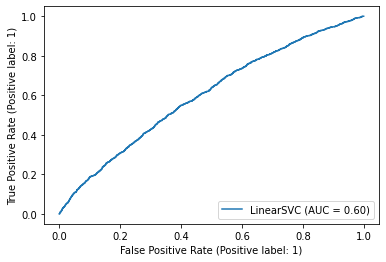

In [30]:
metrics.plot_roc_curve(LinSVC, X_val, y_val) 
plt.show()

### (2) SGD Classifier

In [31]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=0)
SGD.fit(X_train, y_train)
y_SGD = SGD.predict(X_val)

In [32]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_SGD)     # 0.5(A), 0.5(B), 0.5(C)

0.5

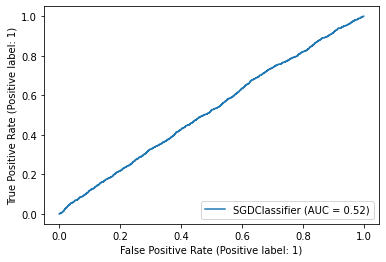

In [33]:
metrics.plot_roc_curve(SGD, X_val, y_val) 
plt.show()

### (3) KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
y_KNN = KNN.predict(X_val)

In [35]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_KNN)     # 0.507(A), 0.502(B), 0.502(C)

0.5015306237556191

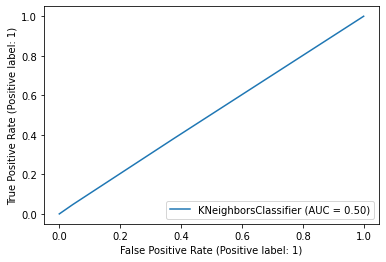

In [36]:
metrics.plot_roc_curve(KNN, X_val, y_val) 
plt.show()

### (4) Kernel Approximation

In [37]:
# check

### (5) SVC

In [38]:
from sklearn.svm import SVC

SVC = SVC(random_state=0)
SVC.fit(X_train, y_train)
y_SVC = SVC.predict(X_val)

In [39]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_SVC)     # 0.5(A), 0.5(B), 0.5(C)

0.5

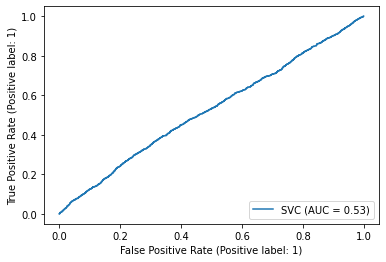

In [40]:
metrics.plot_roc_curve(SVC, X_val, y_val) 
plt.show()

### (6) Ensemble Classifiers _ Randome Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

EnsbRnd = RandomForestRegressor(max_depth=5, random_state=0)
EnsbRnd.fit(X_train, y_train)
y_EnsbRnd = EnsbRnd.predict(X_val)

In [42]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_EnsbRnd)    # 0.551(A), 0.578(B), 0.577(C)

0.5766124074293417

### (7) Ensemble Classifiers _ Bagging

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

EnsbBag = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
EnsbBag.fit(X_train, y_train)
y_EnsbBag = EnsbBag.predict(X_val)

In [44]:
# Compute AUC score
metrics.roc_auc_score(y_val, y_EnsbBag)     # 0.5(A), 0.5(B), 0.5(C)

0.5

## 5. Apply The Best-fit Model to The Testing Data